In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import warnings
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [12]:
X, y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

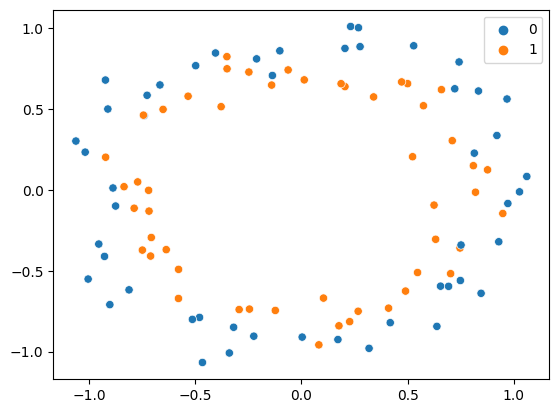

In [14]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [16]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=3500,verbose=0)

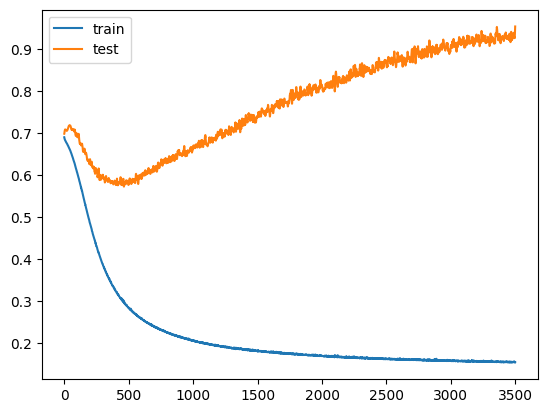

In [24]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 13s 1ms/step


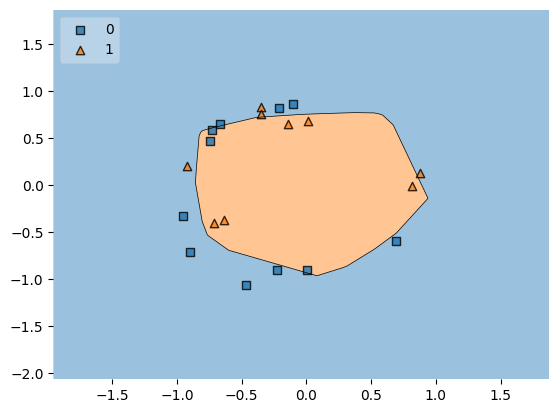

In [26]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

## Early Stopping

In [34]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [37]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 91ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6993 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.7016 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6894 - accuracy: 0.5125 - val_loss: 0.7040 - val_accuracy: 0.3000
Epoch 4/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6880 - accuracy: 0.5375 - val_loss: 0.7061 - val_accuracy: 0.3000
Epoch 5/3500
3/3 [==============================] - 0s 19ms/step - loss: 0.6873 - accuracy: 0.5625 - val_loss: 0.7082 - val_accuracy: 0.3000
Epoch 6/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.6860 - accuracy: 0.5500 - val_loss: 0.7088 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.6852 - accuracy: 0.5375 - val_loss: 0.7100 - val_accuracy: 0.3500
Epoch 8/3500


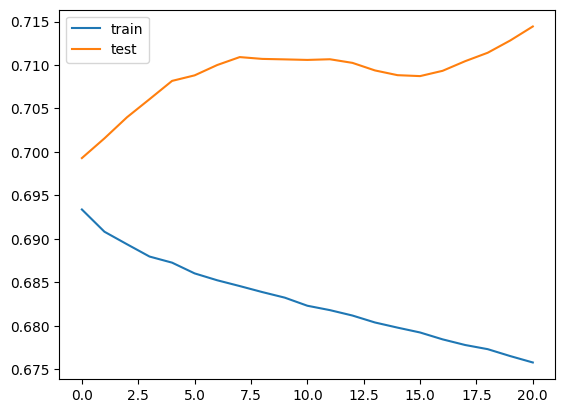

In [38]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()